# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 600
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
# Set default font size
plt.rcParams['font.size'] = 24
import seaborn as sb
# Set default font size
sb.set(font_scale = 1.5)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sb.set_style("white", rc=custom_style)


# Interactive Visualizations
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode(connected=True)

# import cufflinks as cf
# cf.go_offline(connected=True)
# icf.set_config_file(theme='white')

# Analysis/Modeling
Do work here

In [2]:
datadir = '../../../dataset/5_McNemar_PDX_30x/'

In [3]:
f1 = datadir + 'OmicsBinary_StackingCVClassifier_mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster_perfTab.tsv'
df1 = pd.read_csv(f1, sep='\t', header=0, index_col=0)
df1['test_set'] = ['full']*len(df1)
f2 = '../../../dataset/5_McNemar_PDX_30x/tripleNegONLY_OmicsBinary_StackingCVClassifier_mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster_perfTab.tsv'
df2 = pd.read_csv(f2, sep='\t', header=0, index_col=0)
df2['test_set'] = ['tripleNegOnly']*len(df2)
f3 = '../../../dataset/5_McNemar_PDX_30x/CMPvPDX_OmicsBinary_StackingCVClassifier_mutCross+exprPROGENyHALLMARKS+highCNagg_perfTab.tsv' 
df3 = pd.read_csv(f3, sep='\t', header=0, index_col=0)
df3['test_set'] = ['mut+CNV+expr']*len(df3)
performance_df = pd.concat([df1, df2, df3])

In [4]:
performance_df

,split_index,model_name,grid_test_accu,AUC,additionalResistVStripleNeg_ratio,additionalResistVStripleNeg_count,additionalRespondVStripleNeg_ratio,additionalRespondVStripleNeg_count,true_PD__pred_PD,true_PD__pred_SD-OR,true_SD-OR__pred_PD,true_SD-OR__pred_SD-OR,test_set
0,0,stackedCVClassifier,0.842857,0.919328,0.16,4.0,0.000000,0.0,27,6,5,32,full
1,0,handpickedElasticne,0.642857,0.725635,0.04,1.0,0.057143,2.0,18,15,10,27,full
2,0,rawL1elasticnet,0.757143,0.787060,0.08,2.0,0.057143,2.0,22,11,6,31,full
3,0,tripleNegResample_stackedCVClassifier,0.571429,0.632678,0.24,6.0,0.028571,1.0,24,9,21,16,full
4,0,KRAS_BRAF_NRAS_triple_neg,0.857143,0.851761,NaN,NaN,NaN,NaN,25,8,2,35,full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,27,CMPstackedCVClassifier,0.471429,0.473382,NaN,NaN,NaN,NaN,30,3,34,3,mut+CNV+expr
56,28,PDXstackedCVClassifier,0.485714,0.677723,NaN,NaN,NaN,NaN,33,0,36,1,mut+CNV+expr
57,28,CMPstackedCVClassifier,0.442857,0.572482,NaN,NaN,NaN,NaN,30,3,36,1,mut+CNV+expr
58,29,PDXstackedCVClassifier,0.457143,0.563063,NaN,NaN,NaN,NaN,31,2,36,1,mut+CNV+expr


In [10]:
# compute precision,recall,F1
performance_df['precision'] = performance_df['true_SD-OR__pred_SD-OR'] /\
	 (performance_df['true_SD-OR__pred_SD-OR'] +\
		  performance_df['true_PD__pred_SD-OR'])
performance_df['recall'] = performance_df['true_SD-OR__pred_SD-OR'] /\
	 (performance_df['true_SD-OR__pred_SD-OR'] +\
		  performance_df['true_SD-OR__pred_PD'])
performance_df['F1'] = 2*(performance_df.precision * performance_df.recall) /\
	 (performance_df.precision + performance_df.recall) 
performance_df[['recall', 'precision', 'F1']] 

,recall,precision,F1
0,0.864865,0.842105,0.853333
1,0.729730,0.642857,0.683544
2,0.837838,0.738095,0.784810
3,0.432432,0.640000,0.516129
4,0.945946,0.813953,0.875000
...,...,...,...
55,0.081081,0.500000,0.139535
56,0.027027,1.000000,0.052632
57,0.027027,0.250000,0.048780
58,0.027027,0.333333,0.050000


# Results
Show graphs and stats here

### visualise model AUC on training set across replicates

In [11]:
df1.AUC.max()

0.9262899262899262

Text(0.5, 1.0, 'Full test set (N=57) ROC AUC across 30 replicates')

(0.45, 0.95)

Text(0, 0.5, '')

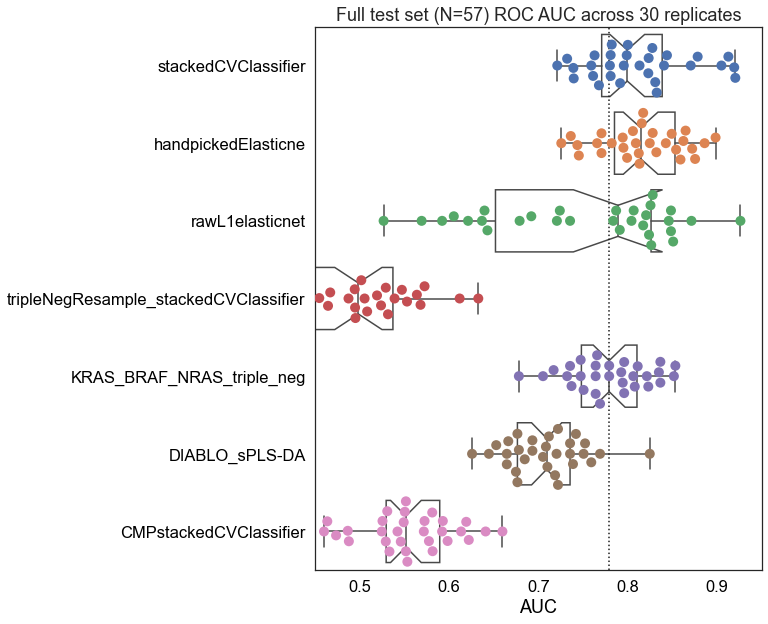

In [17]:

fig, ax = plt.subplots(figsize=(8,10))
fig.subplots_adjust(hspace=0.5)
plot_data =pd.concat([df1, df3[df3.model_name == 'CMPstackedCVClassifier']])
ax = sb.boxplot(x="AUC", y="model_name", 
	notch=True, 
	data=plot_data, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax)
ax = sb.swarmplot(x="AUC", y="model_name", 
	data=plot_data,
	s=10, ax=ax)
ax.set_title(f'Full test set (N=57) ROC AUC across 30 replicates')
ax.set_xlim(.45,.95)
median_tripleNeg = plot_data[
	plot_data.model_name == 'KRAS_BRAF_NRAS_triple_neg'].AUC.median() 
ax.axvline(median_tripleNeg, ls=':', c='k')
ax.set_ylabel('')


Text(0.5, 1.0, 'Full test set (N=57) F1 score across 30 replicates')

(0.45, 0.95)

Text(0, 0.5, '')

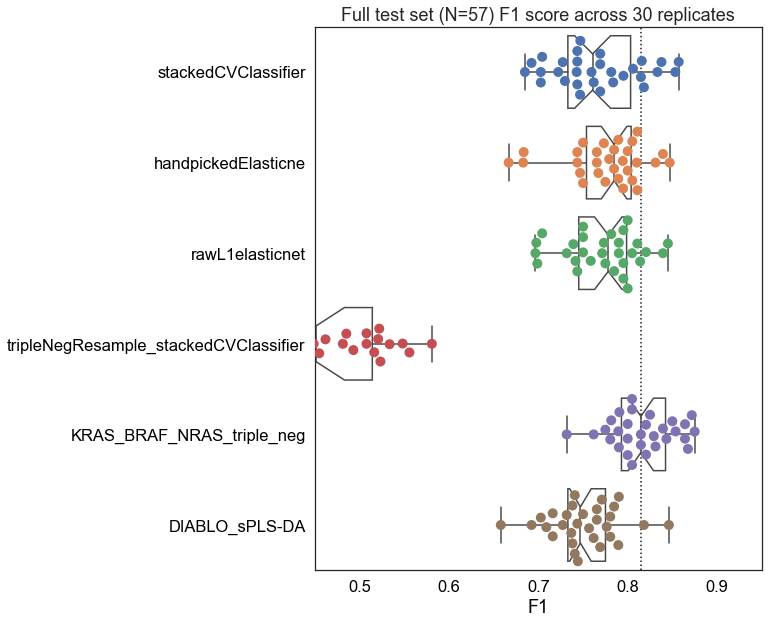

In [18]:

fig, ax = plt.subplots(figsize=(8,10))
fig.subplots_adjust(hspace=0.5)
plot_data = performance_df[performance_df.test_set=='full']
ax = sb.boxplot(x="F1", y="model_name", 
	notch=True, 
	data=plot_data, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax)
ax = sb.swarmplot(x="F1", y="model_name", 
	data=plot_data,
	s=10, ax=ax)
ax.set_title(f'Full test set (N=57) F1 score across 30 replicates')
ax.set_xlim(.45,.95)
median_tripleNeg = plot_data[
	plot_data.model_name == 'KRAS_BRAF_NRAS_triple_neg'].F1.median() 
ax.axvline(median_tripleNeg, ls=':', c='k')
ax.set_ylabel('')

/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorica

Text(0.5, 1.0, 'Full test set (N=57) additional responders V tripleNeg ratio\nacross 30 replicates')

Text(0, 0.5, '')

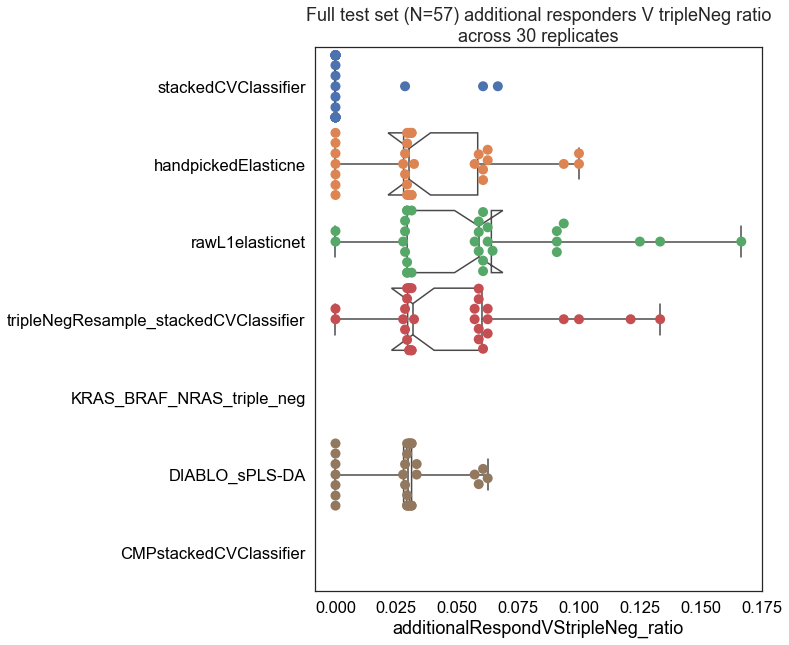

In [7]:
fig, ax = plt.subplots(figsize=(8,10))
fig.subplots_adjust(hspace=0.5)
plot_data = df1
ax = sb.boxplot(x="additionalRespondVStripleNeg_ratio", y="model_name", 
	notch=True, 
	data=plot_data, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax)
ax = sb.swarmplot(x="additionalRespondVStripleNeg_ratio", y="model_name", 
	data=pd.concat([df1, df3[df3.model_name == 'CMPstackedCVClassifier']]),
	s=10, ax=ax)
ax.set_title(f'Full test set (N=57) additional responders V tripleNeg ratio\n'
'across 30 replicates')
ax.set_ylabel('')

Text(0.5, 1.0, 'Full test set (N=57) additional resist V tripleNeg ratio\nacross 30 replicates')

Text(0, 0.5, '')

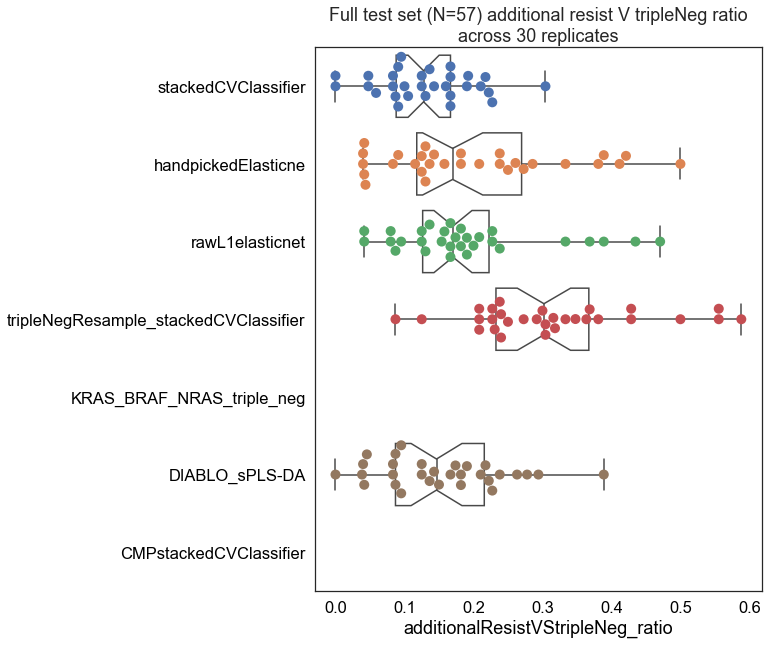

In [8]:
fig, ax = plt.subplots(figsize=(8,10))
fig.subplots_adjust(hspace=0.5)
plot_data = df1
ax = sb.boxplot(x="additionalResistVStripleNeg_ratio", y="model_name", 
	notch=True, 
	data=plot_data, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax)
ax = sb.swarmplot(x="additionalResistVStripleNeg_ratio", y="model_name", 
	data=pd.concat([df1, df3[df3.model_name == 'CMPstackedCVClassifier']]),
	s=10, ax=ax)
ax.set_title(f'Full test set (N=57) additional resist V tripleNeg ratio\n'
'across 30 replicates')
ax.set_ylabel('')

/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

Text(0.5, 1.0, 'Full test set (N=57) ROC AUC across 30 replicates')

(0.45, 0.9)

Text(0, 0.5, '')

/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'TripleNegOnly test set (N=40) ROC AUC across 30 replicates')

(0.45, 0.9)

Text(0, 0.5, '')

Text(0.5, 1.0, 'Mut+CNV+Epxr test set (N=57) ROC AUC across 30 replicates')

(0.45, 0.9)

Text(0, 0.5, '')

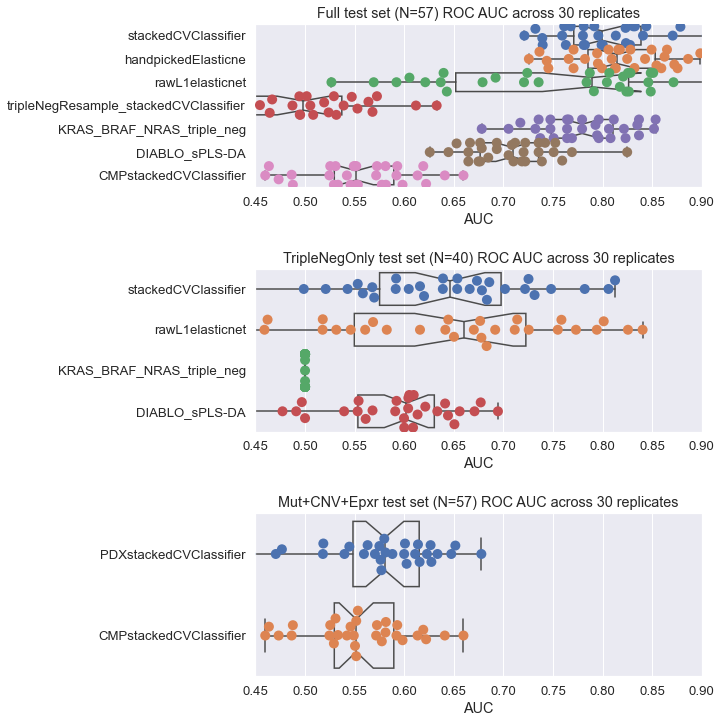

In [10]:
sb.set(font_scale = 1.2)
fig, axes = plt.subplots(3,1, figsize=(8,12))
ax1, ax2, ax3 = axes
fig.subplots_adjust(hspace=0.5)
ax1 = sb.boxplot(x="AUC", y="model_name", 
	notch=True, 
	data=pd.concat([df1, df3[df3.model_name == 'CMPstackedCVClassifier']]), 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax1)
ax1 = sb.swarmplot(x="AUC", y="model_name", 
	data=pd.concat([df1, df3[df3.model_name == 'CMPstackedCVClassifier']]),
	s=10, ax=ax1)
ax1.set_title(f'Full test set (N=57) ROC AUC across 30 replicates')
ax1.set_xlim(.45,.9)
ax1.set_ylabel('')
#fig = ax.get_figure()
#fig.savefig('aggROCAUC_boxswarm_test.pdf', format='pdf', bbox_inches='tight') 

ax2 = sb.boxplot(x="AUC", y="model_name", 
	notch=True, 
	data=df2, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax2)
ax2 = sb.swarmplot(x="AUC", y="model_name", 
	data=df2, s=10, ax=ax2)
ax2.set_title(f'TripleNegOnly test set (N=40) ROC AUC across 30 replicates')
ax2.set_xlim(.45,.9)
ax2.set_ylabel('')
#fig = ax.get_figure()

ax3 = sb.boxplot(x="AUC", y="model_name", 
	notch=True, 
	data=df3, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax3)
ax3 = sb.swarmplot(x="AUC", y="model_name", 
	data=df3,  s=10, ax=ax3)
ax3.set_title(f'Mut+CNV+Epxr test set (N=57) ROC AUC across 30 replicates')
ax3.set_xlim(.45,.9)
ax3.set_ylabel('')
#fig = ax.get_figure()
#fig.savefig('aggROCAUC_boxswarm_test.pdf', format='pdf', bbox_inches='tight') 

fig.savefig('aggROCAUC_Full+TripleNegOnly_boxswarm_test.pdf', 
	format='pdf', bbox_inches='tight') 

### visualise model accuracy on training set across replicates

/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Full test set (N=57) prediction accuracy across 30 replicates')

(0.45, 0.9)

Text(0, 0.5, '')

Text(0.5, 1.0, 'TripleNegOnly test set (N=40) prediction accuracy across 30 replicates')

(0.45, 0.9)

Text(0, 0.5, '')

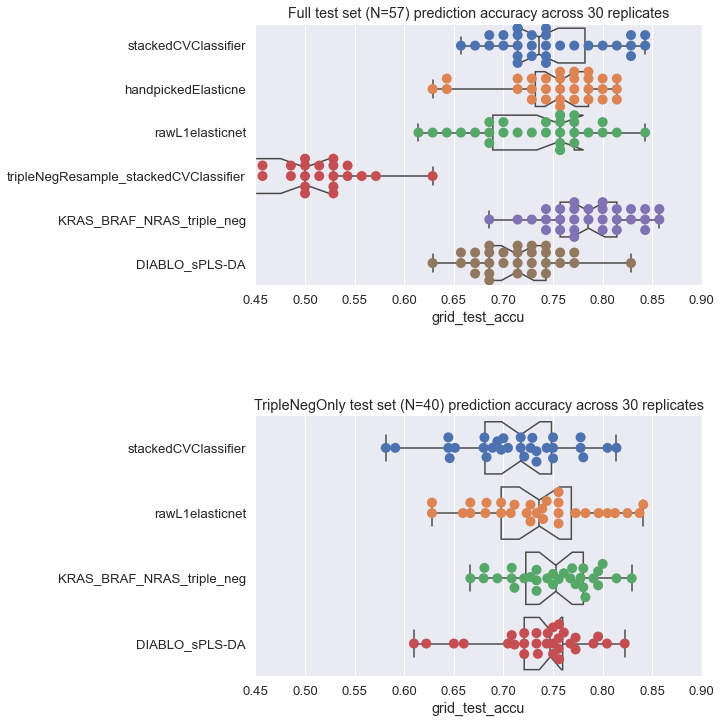

In [11]:
fig, axes = plt.subplots(2,1, figsize=(8,12))
ax1, ax2 = axes
fig.subplots_adjust(hspace=0.5)
ax1 = sb.boxplot(x="grid_test_accu", y="model_name", 
	notch=True, 
	data=df1, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax1)
ax1 = sb.swarmplot(x="grid_test_accu", y="model_name", 
	data=df1, s=10, ax=ax1)
ax1.set_title(f'Full test set (N=57) prediction accuracy across 30 replicates')
ax1.set_xlim(.45,.9)
ax1.set_ylabel('')#fig = ax.get_figure()
#fig.savefig('aggROCAUC_boxswarm_test.pdf', format='pdf', bbox_inches='tight') 

ax2 = sb.boxplot(x="grid_test_accu", y="model_name", 
	notch=True, 
	data=df2, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax2)
ax2 = sb.swarmplot(x="grid_test_accu", y="model_name", 
	data=df2, s=10, ax=ax2)
ax2.set_title(f'TripleNegOnly test set (N=40) prediction accuracy across 30 replicates')
ax2.set_xlim(.45,.9)
ax2.set_ylabel('')
#fig = ax.get_figure()
fig.savefig('aggACCU_Full+TripleNegOnly_boxswarm_test.pdf', 
	format='pdf', bbox_inches='tight') 

### aggregate replicate confusion matrices by mean and visualise as heatmap

In [12]:
def agg_confMatrix(df):
	aggAvg_confMatrix = pd.DataFrame(np.array([[df['true_PD__pred_PD'].mean(),
			df['true_PD__pred_SD-OR'].mean()],
			[df['true_SD-OR__pred_PD'].mean(),
			df['true_SD-OR__pred_SD-OR'].mean()]]), 
			columns=['pred_PD', 'pred_SD-OR'],
			index=['true_PD', 'true_SD-OR'])
	return aggAvg_confMatrix
DIABLO_aggAvg_confMatrix = agg_confMatrix(performance_df[performance_df.model_name == 'DIABLO_sPLS-DA'])
stacked_aggAvg_confMatrix = agg_confMatrix(performance_df[performance_df.model_name == 'stackedCVClassifier'])
rawL1elasticnet_aggAvg_confMatrix = agg_confMatrix(performance_df[performance_df.model_name == 'rawL1elasticnet'])
tripleNeg_aggAvg_confMatrix = agg_confMatrix(performance_df[performance_df.model_name == 'KRAS_BRAF_NRAS_triple_neg'])  

Text(0.5, 1.0, 'StackingCVClassifier test set (N=57) mean confusion matrix across 10 replicates')

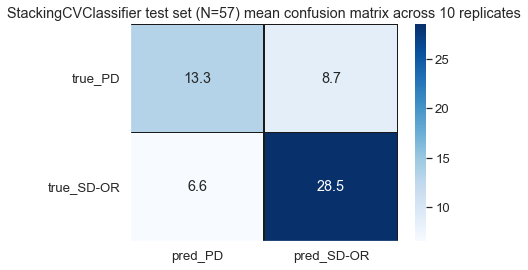

In [13]:
ax = sb.heatmap(stacked_aggAvg_confMatrix, 
		annot=True, 
		fmt=".1f", 
		linewidths=.5,
		cmap='Blues',
		linecolor='k')
sb.despine(ax=ax, offset=0) # show axes to close heatmap border
ax.set_title('StackingCVClassifier test set (N=57) mean confusion matrix across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggconfMatrix_heatmap_StackingCVClassifier_test.pdf', format='pdf', bbox_inches='tight') 


Text(0.5, 1.0, 'KRAS_BRAF_NRAS_triple_neg test set (N=57) mean confusion matrix across 10 replicates')

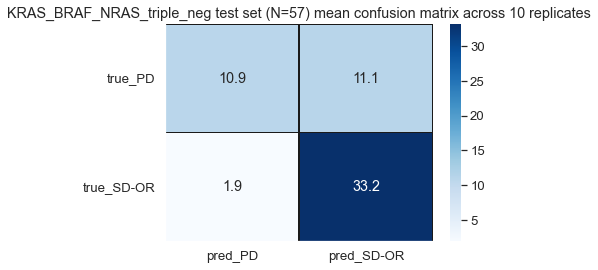

In [14]:
ax = sb.heatmap(tripleNeg_aggAvg_confMatrix, 
		annot=True, 
		fmt=".1f", 
		linewidths=.5,
		cmap='Blues',
		linecolor='k')
sb.despine(ax=ax, offset=0) # show axes to close heatmap border
ax.set_title('KRAS_BRAF_NRAS_triple_neg test set (N=57) mean confusion matrix across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggconfMatrix_heatmap_KRAS_BRAF_NRAS_triple_neg_test.pdf', format='pdf', bbox_inches='tight') 

Text(0.5, 1.0, 'rawL1elasticnet test set (N=57) mean confusion matrix across 10 replicates')

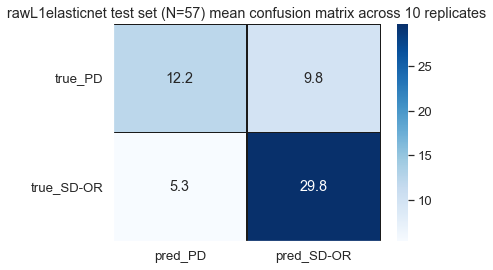

In [15]:
ax = sb.heatmap(rawL1elasticnet_aggAvg_confMatrix, 
		annot=True, 
		fmt=".1f", 
		linewidths=.5,
		cmap='Blues',
		linecolor='k')
sb.despine(ax=ax, offset=0) # show axes to close heatmap border
ax.set_title('rawL1elasticnet test set (N=57) mean confusion matrix across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggconfMatrix_heatmap_rawL1elasticnet_test.pdf', format='pdf', bbox_inches='tight') 

Text(0.5, 1.0, 'DIABLO_sPLS-DD test set (N=57) mean confusion matrix across 10 replicates')

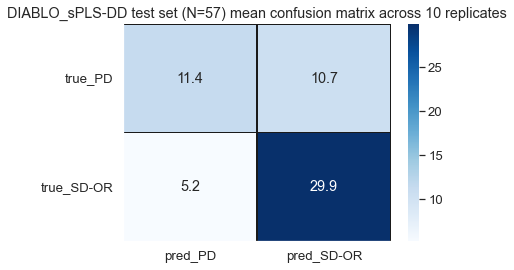

In [16]:
ax = sb.heatmap(DIABLO_aggAvg_confMatrix, 
		annot=True, 
		fmt=".1f", 
		linewidths=.5,
		cmap='Blues',
		linecolor='k')
sb.despine(ax=ax, offset=0) # show axes to close heatmap border
ax.set_title('DIABLO_sPLS-DD test set (N=57) mean confusion matrix across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggconfMatrix_heatmap_DIABLO_sPLS-DA_test.pdf', format='pdf', bbox_inches='tight') 

# Conclusions and Next Steps
Summarize findings here